<a href="https://colab.research.google.com/github/caropeboka/automobile-regression/blob/main/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
#importing dataset
cars = pd.read_csv('drive/MyDrive/Dataset/Automobile_data.csv')

#seeing the first 5 rows
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
#seeing dataset structure
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
#seeing dataset shape
cars.shape

(205, 26)

In [ ]:
#seeing columns
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
#looking for total missing values in each column
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
#creating a list with the possible characters that are replacing missing values
missing_values = ['?','--','-','??','.']

#importing dataset
cars = pd.read_csv('drive/MyDrive/Dataset/Automobile_data.csv',na_values = missing_values)

#seeing the first 5 rows
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
#verifying continuos variables
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


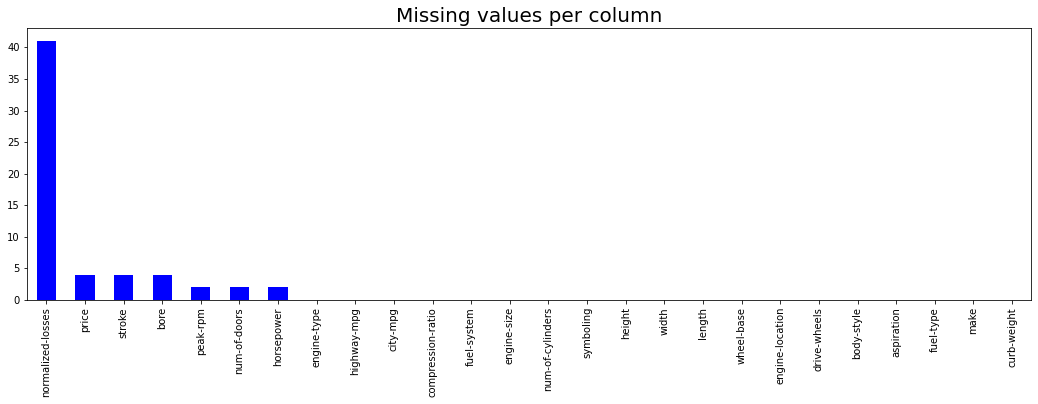

In [ ]:
#dealing with missing values
plt.subplots(0,0, figsize = (18,5))
ax = (cars.isnull().sum()).sort_values(ascending = False).plot.bar(color = 'blue')
plt.title('Missing values per column', fontsize = 20);

In [ ]:
#interpolating a linear regression to replace missing values in continuos variables
cars['normalized-losses'] = cars['normalized-losses'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['price'] = cars['price'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['stroke'] = cars['stroke'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['bore'] = cars['bore'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['peak-rpm'] = cars['peak-rpm'].interpolate(method = "linear"
                                      ,limit_direction = "both")

cars['horsepower'] = cars['horsepower'].interpolate(method = "linear"
                                      ,limit_direction = "both")

In [ ]:
#counting number of missing values in num_of_doors
cars['num-of-doors'].isna().sum()

2

In [ ]:
#looking what body_style and make our missing values have
cars[['make','body-style']][cars['num-of-doors'].isnull()==True]

,make,body-style
27,dodge,sedan
63,mazda,sedan


In [ ]:
#seeing how many doors a mazda sedan have
cars['num-of-doors'][(cars['body-style']=='sedan') & (cars['make']=='mazda')]

53    four
54    four
60    four
62    four
63     NaN
65    four
66    four
Name: num-of-doors, dtype: object

In [ ]:
#seeing how many doors a dodge sedan have
cars['num-of-doors'][(cars['body-style']=='sedan') & (cars['make']=='dodge')]

25    four
26    four
27     NaN
Name: num-of-doors, dtype: object

In [ ]:
#replacing missing values into num_of_doors
cars['num-of-doors'] = cars['num-of-doors'].fillna('four')

In [ ]:
#verifying missing values
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

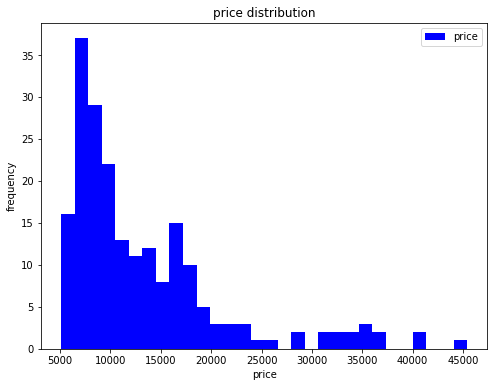

In [ ]:
#exploratory data analysis
plt.figure(figsize=(8,6))
plt.hist(cars['price']
         ,bins=30
         ,label='price'
        ,color='blue')

plt.xlabel('price')
plt.ylabel('frequency')
plt.legend()
plt.title('price distribution');

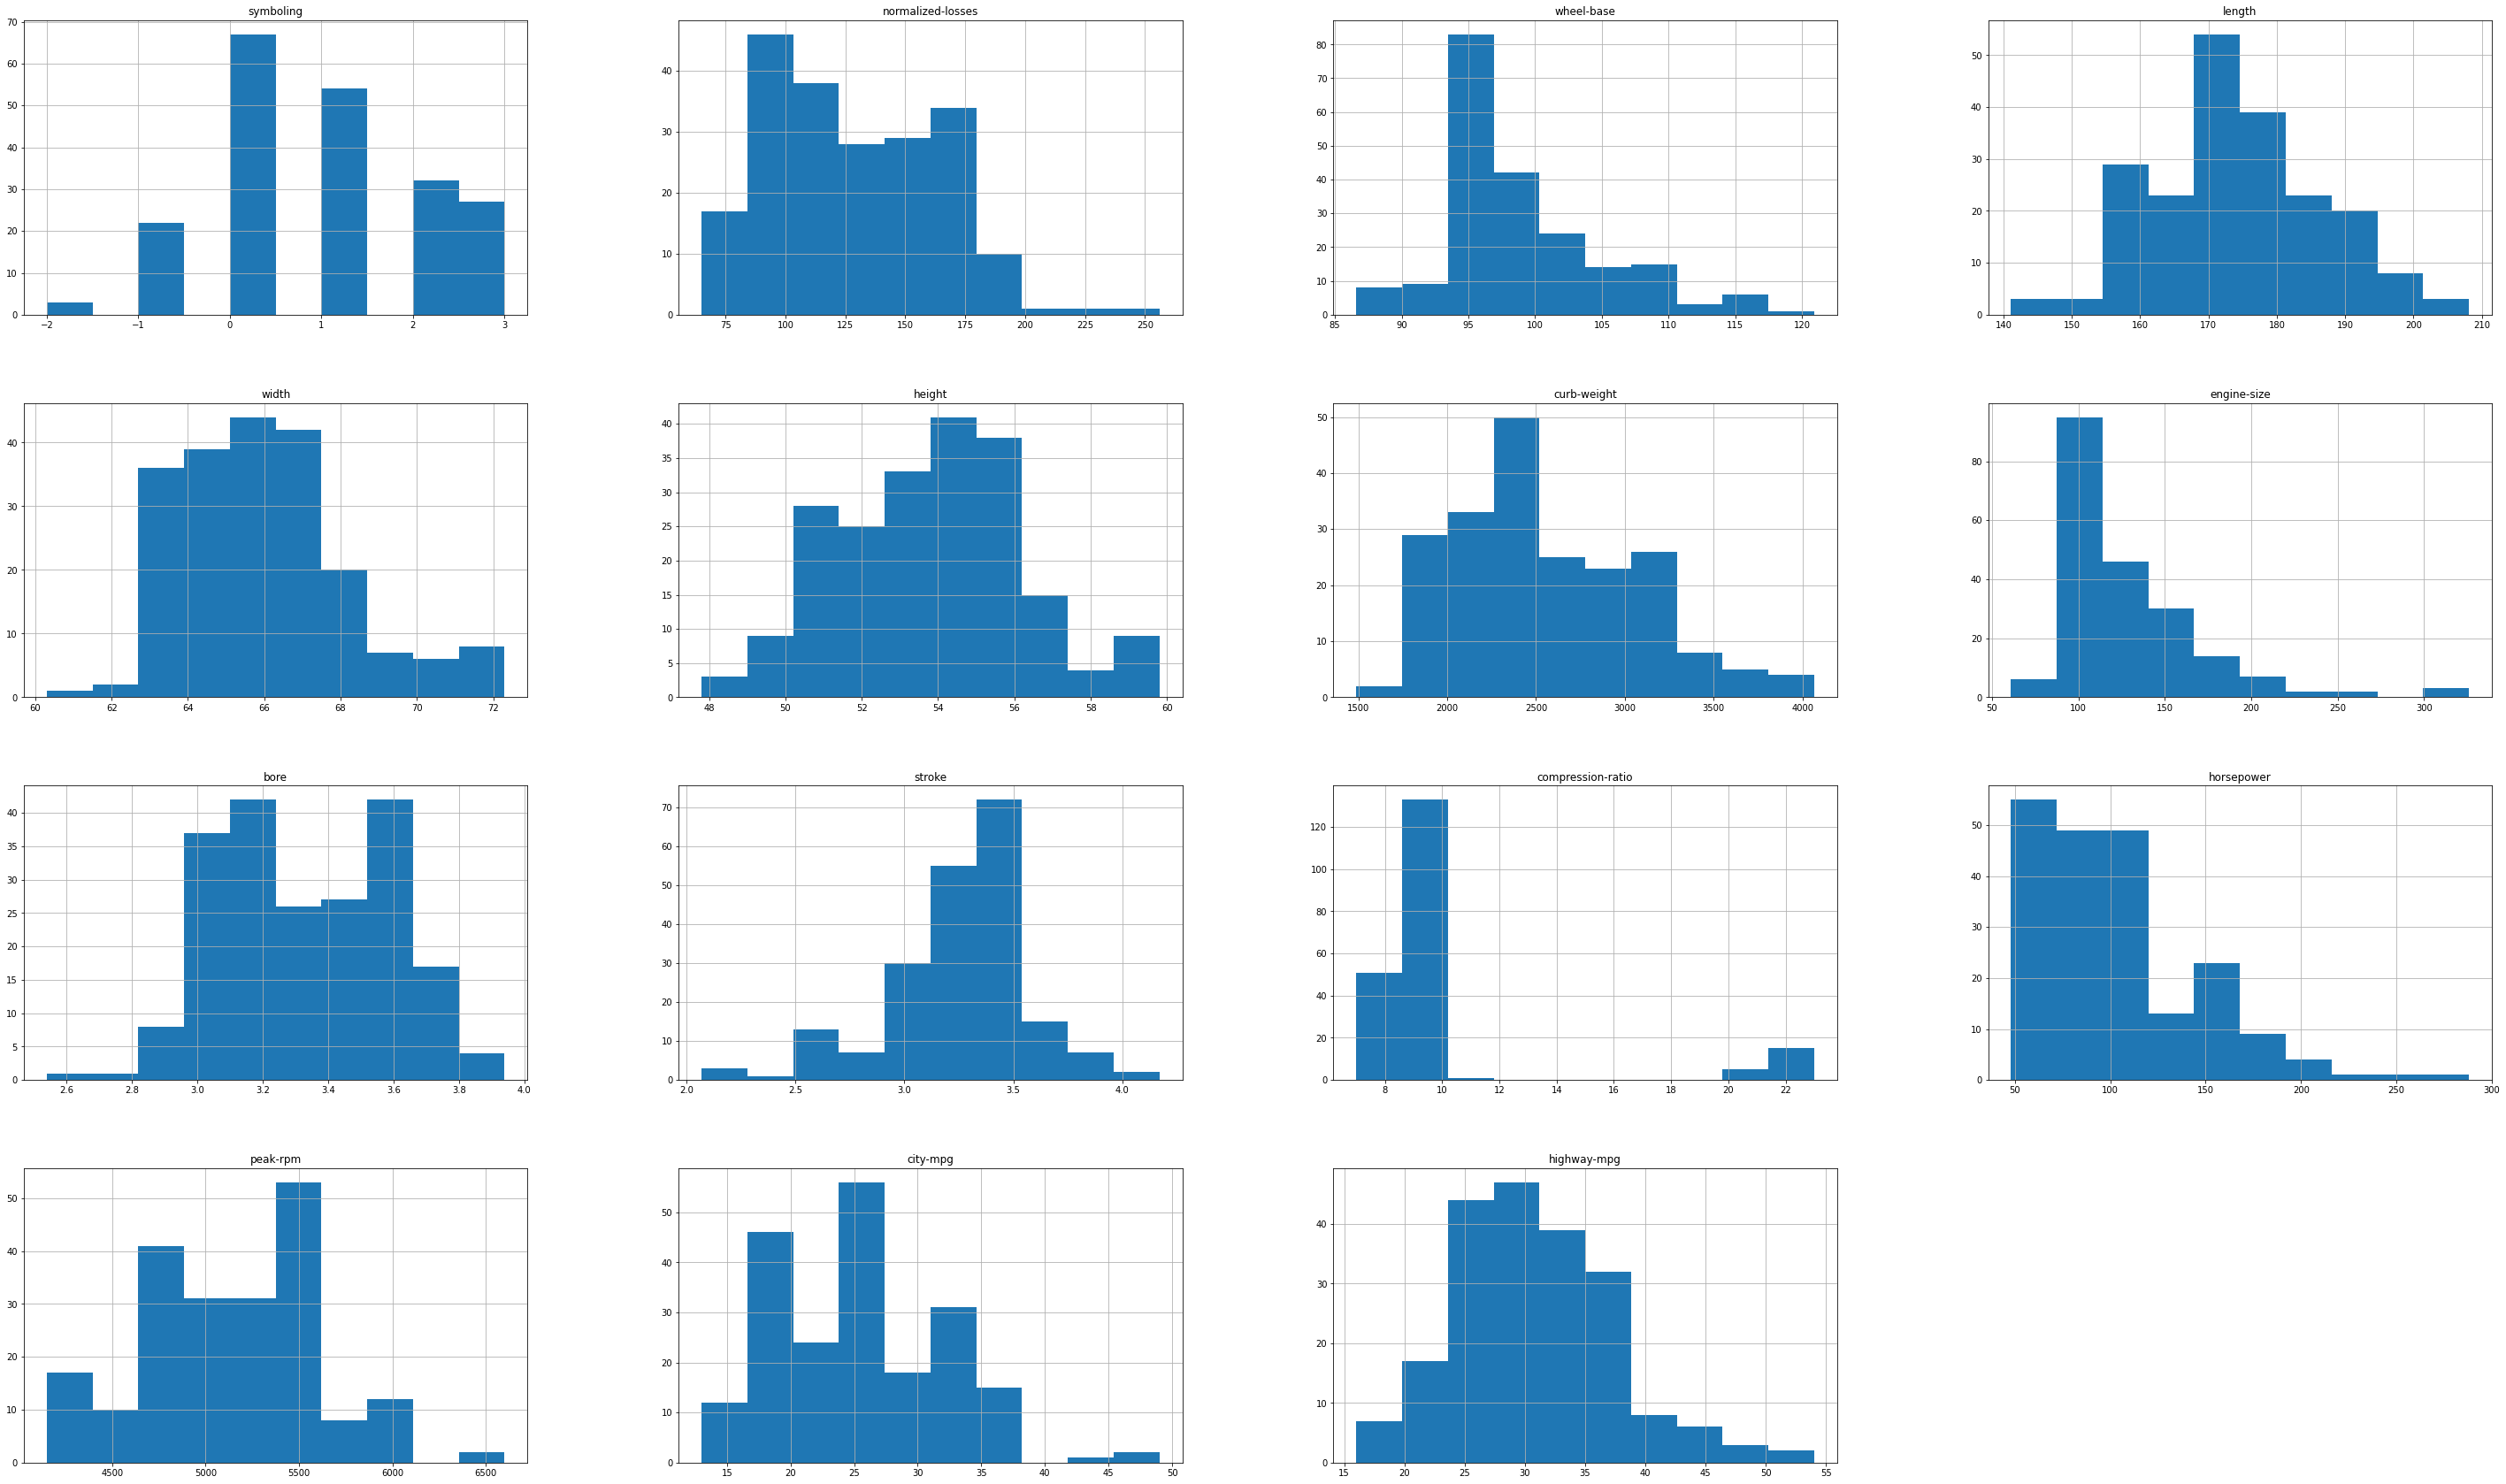

In [ ]:
#saving numerical features
num_var = ['symboling','normalized-losses','wheel-base','length'
          ,'width','height','curb-weight','engine-size','bore'
           ,'stroke','compression-ratio','horsepower','peak-rpm'
           ,'city-mpg','highway-mpg']

#plotting a histogram for each feature
cars[num_var].hist(bins=10
                   , figsize=(50,30)
                   , layout=(4,4));

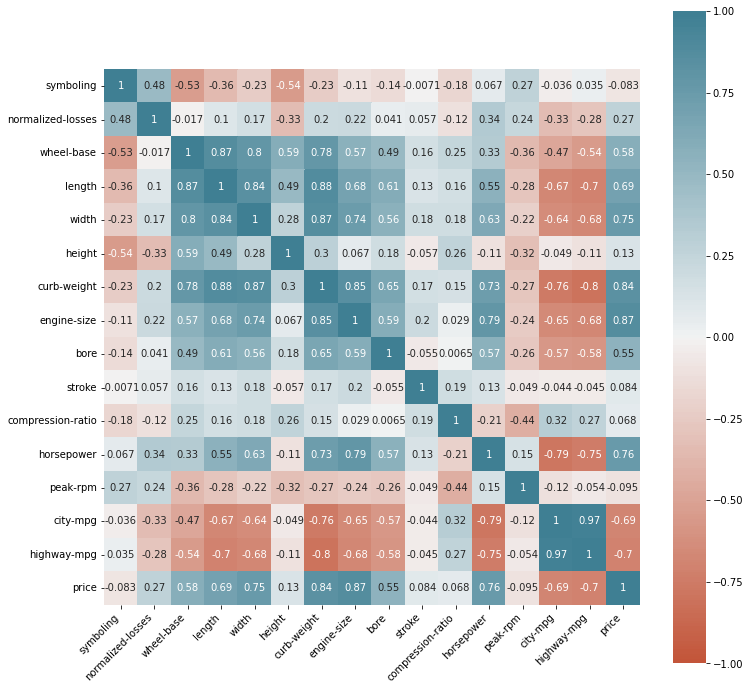

In [ ]:
#numerical variables correlation
corr = cars.corr()

plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0,
    annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

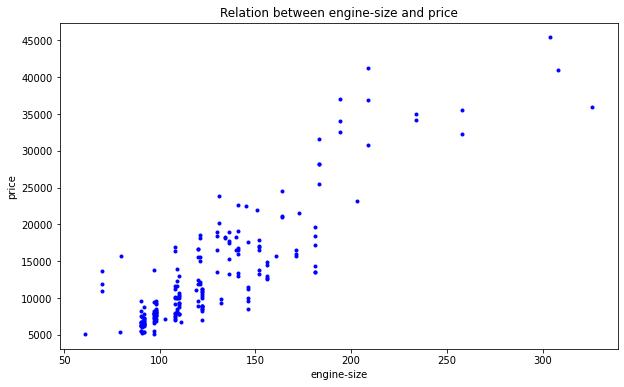

In [ ]:
#plotting a scatter plot of relation between engine_size and price
plt.figure(figsize=(10,6))
plt.plot(cars['engine-size']
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('engine-size')
plt.ylabel('price')
plt.title('Relation between engine-size and price');

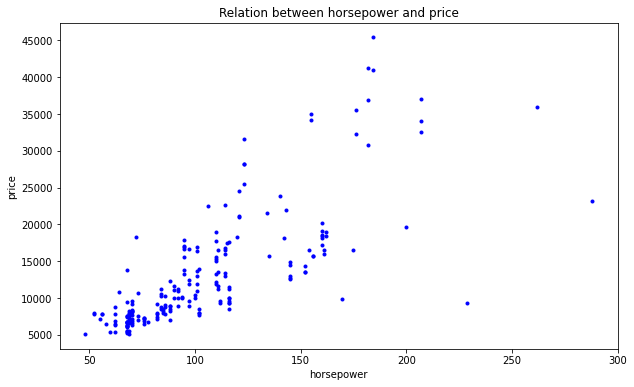

In [ ]:
#plotting a scatter plot of relation between horsepower and price
plt.figure(figsize=(10,6))
plt.plot(cars['horsepower']
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Relation between horsepower and price');

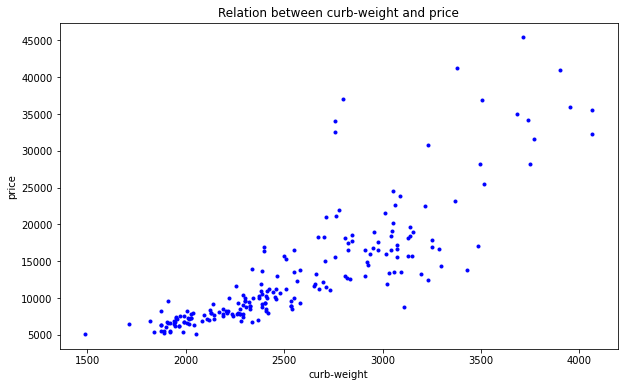

In [ ]:
#plotting a scatter plot of relation between curb_weight and price
plt.figure(figsize=(10,6))
plt.plot(cars['curb-weight']
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('curb-weight')
plt.ylabel('price')
plt.title('Relation between curb-weight and price');

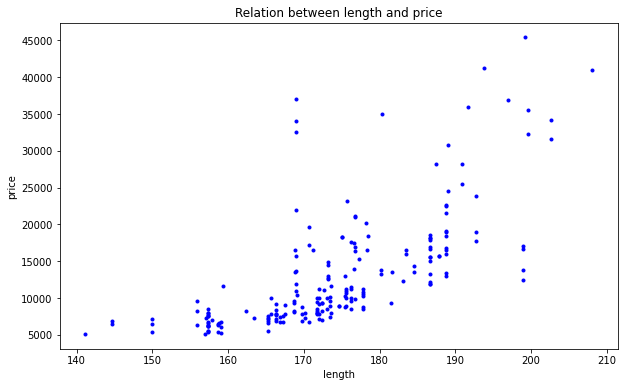

In [ ]:
#plotting a scatter plot of relation between length and price
plt.figure(figsize=(10,6))
plt.plot(cars['length']
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('length')
plt.ylabel('price')
plt.title('Relation between length and price');

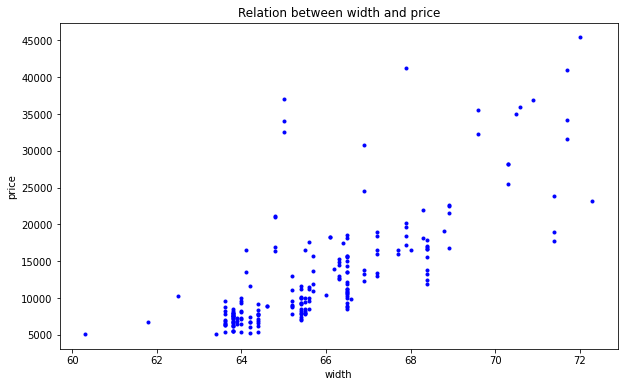

In [ ]:
#plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6))
plt.plot(cars['width']
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('width')
plt.ylabel('price')
plt.title('Relation between width and price');

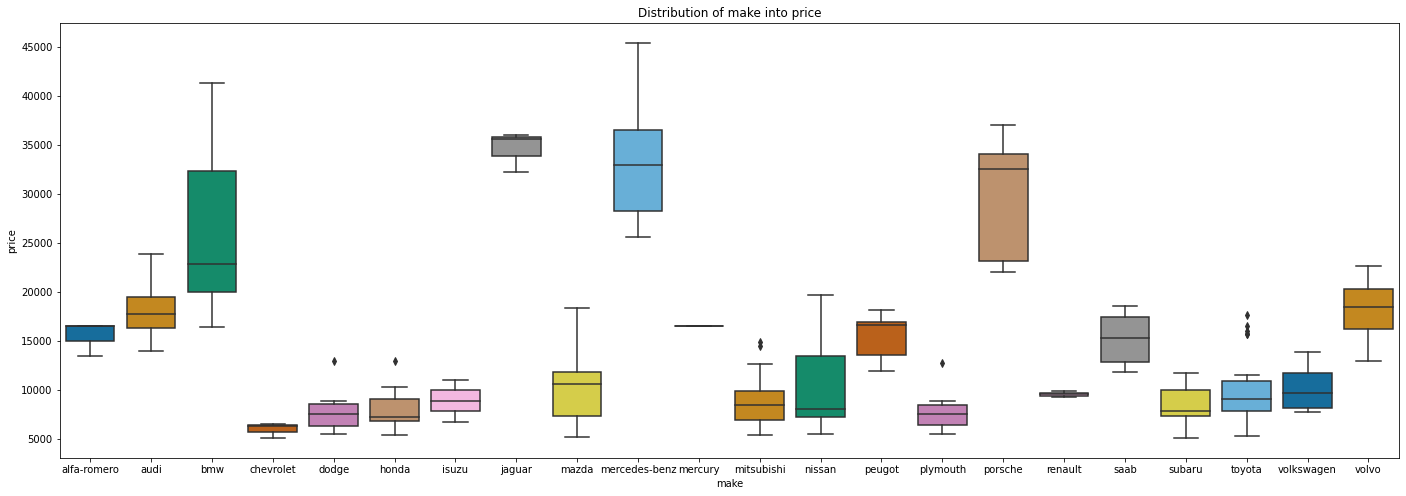

In [ ]:
#bivariate analysis of each categorical feature
plt.figure(figsize=(24,8))
sns.boxplot(x='make',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of make into price');

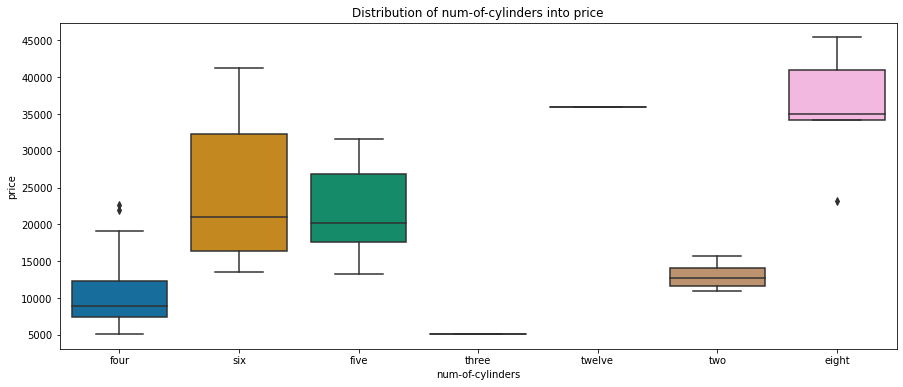

In [ ]:
#plotting distribution of num_of_cylinders into price
plt.figure(figsize=(15,6))
sns.boxplot(x='num-of-cylinders',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of num-of-cylinders into price');

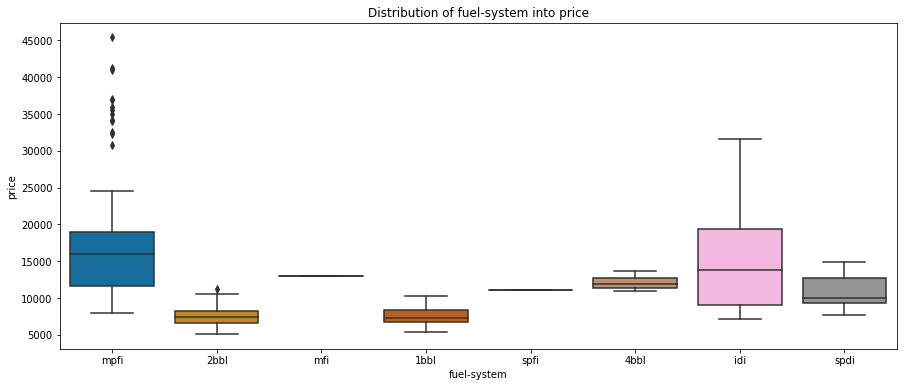

In [ ]:
#plotting distribution of fuel_system into price
plt.figure(figsize=(15,6))
sns.boxplot(x='fuel-system',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of fuel-system into price');

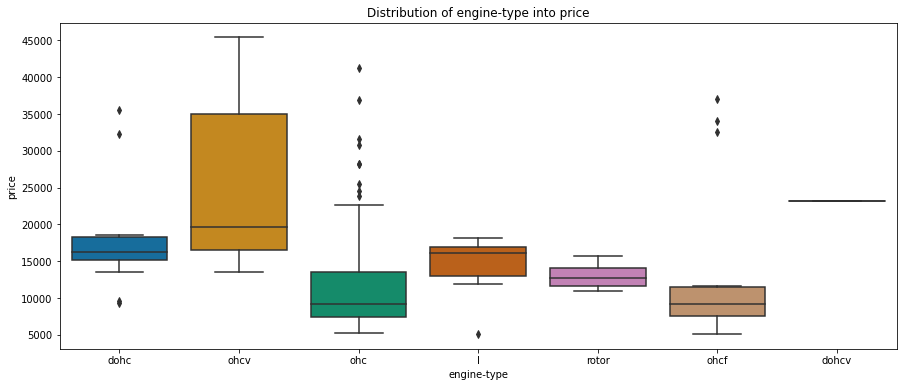

In [ ]:
#plotting distribution of engine_type into price
plt.figure(figsize=(15,6))
sns.boxplot(x='engine-type',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of engine-type into price');

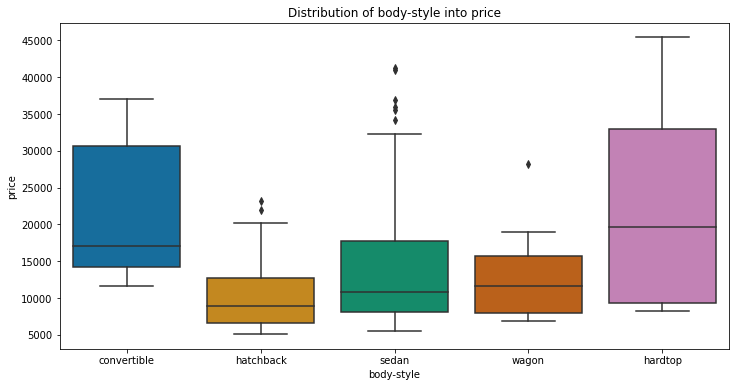

In [ ]:
#plotting distribution of body_style into price
plt.figure(figsize=(12,6))
sns.boxplot(x='body-style',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of body-style into price');

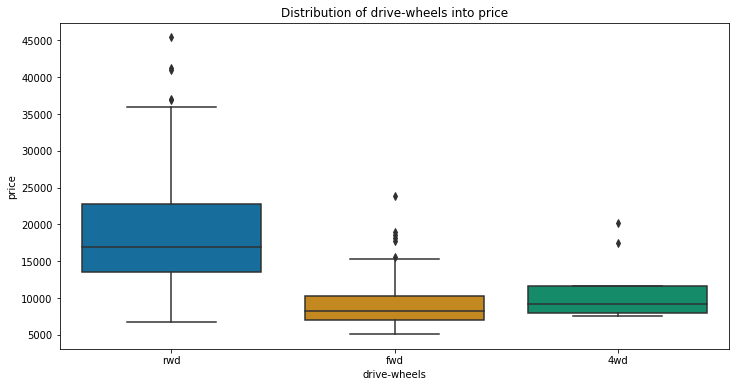

In [ ]:
#plotting distribution of drive_wheels into price
plt.figure(figsize=(12,6))
sns.boxplot(x='drive-wheels',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of drive-wheels into price');

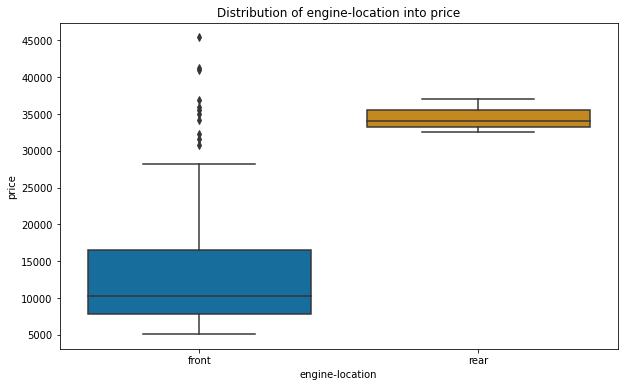

In [ ]:
#plotting distribution of engine_location into price
plt.figure(figsize=(10,6))
sns.boxplot(x='engine-location',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of engine-location into price');

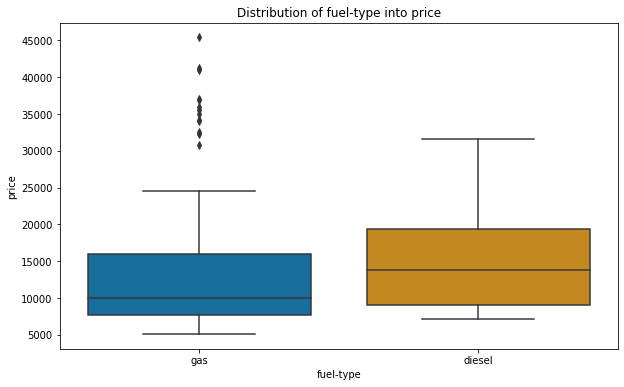

In [ ]:
#plotting distribution of fuel_type into price
plt.figure(figsize=(10,6))
sns.boxplot(x='fuel-type',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of fuel-type into price');

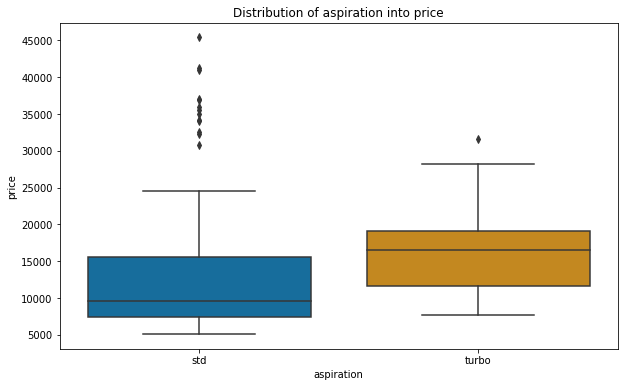

In [ ]:
#plotting distribution of aspiration into price
plt.figure(figsize=(10,6))
sns.boxplot(x='aspiration',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of aspiration into price');

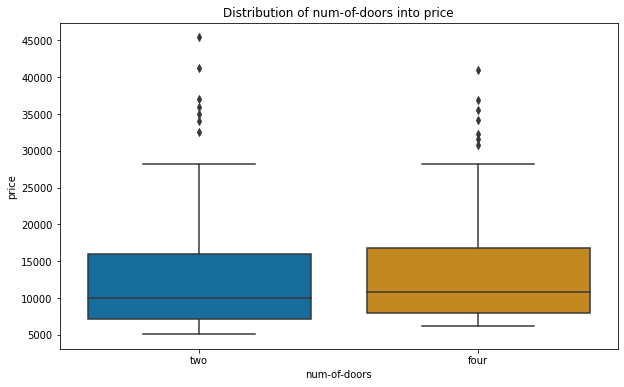

In [ ]:
#plotting distribution of num_of_doors into price
plt.figure(figsize=(10,6))
sns.boxplot(x='num-of-doors',y='price',data=cars, 
                 palette="colorblind")
plt.title('Distribution of num-of-doors into price');

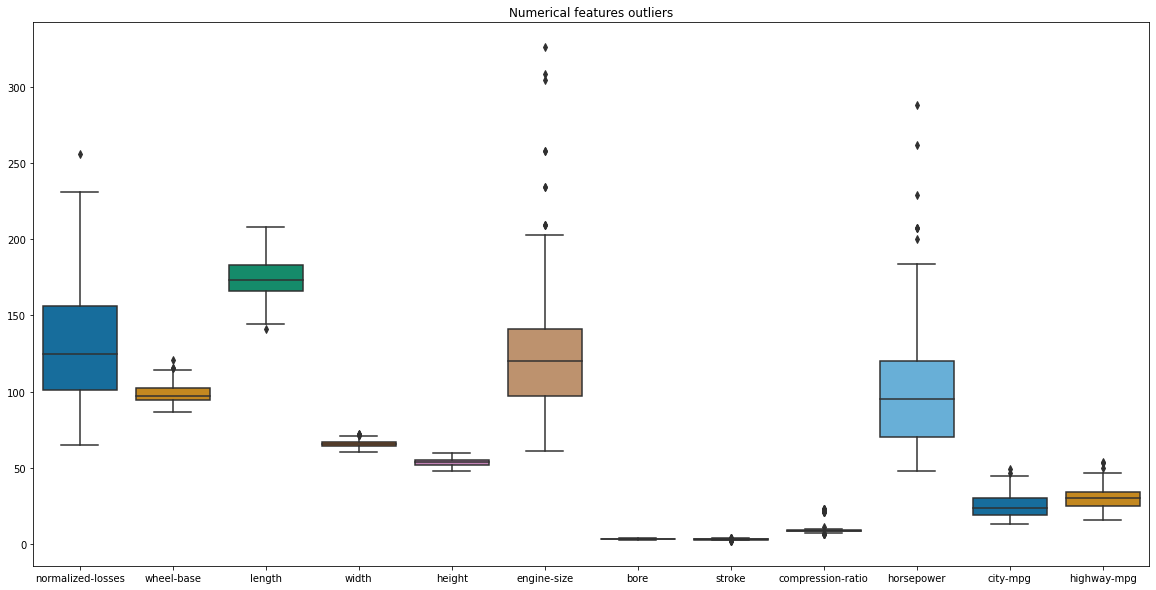

In [ ]:
#feature engineering
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','engine-size','bore'
           ,'stroke','compression-ratio','horsepower'
           ,'city-mpg','highway-mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outliers');

In [ ]:
#creating a for to replace outliers using boxplot method
for i in num_var:
    Q1 = cars[i].quantile(0.25)
    Q3 = cars[i].quantile(0.75)
    IQR = Q3 - Q1
    cars[i] = np.where(cars[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),cars[i])
    cars[i] = np.where(cars[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),cars[i])

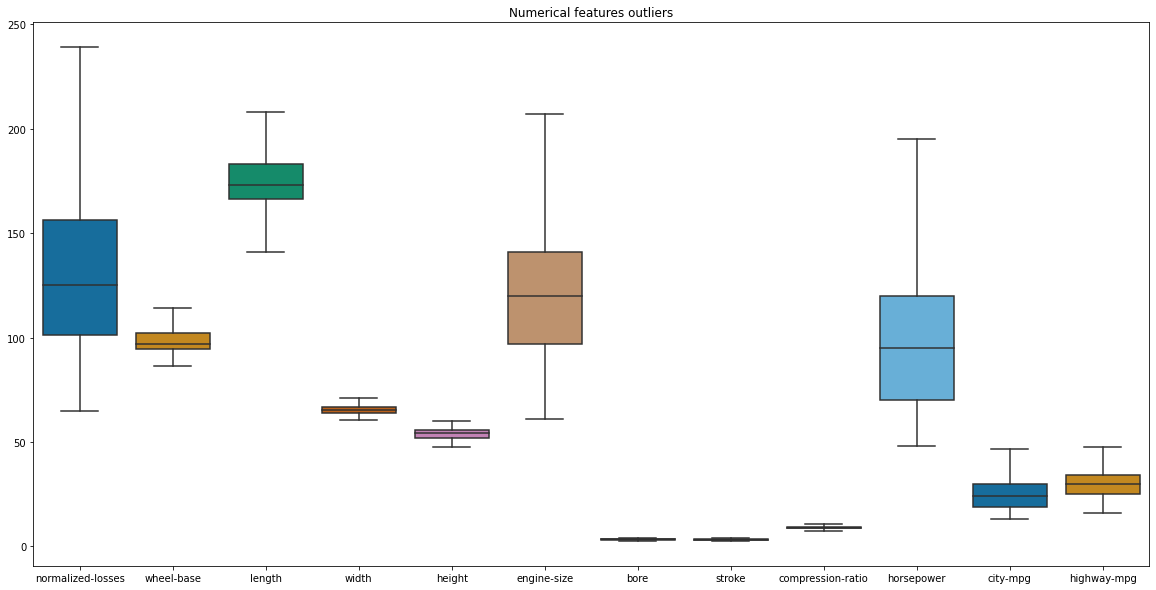

In [ ]:
#plotting boxplots to numeric features
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','engine-size','bore'
           ,'stroke','compression-ratio','horsepower'
           ,'city-mpg','highway-mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outliers');

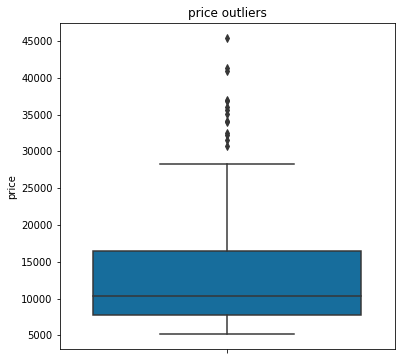

In [ ]:
#plotting a boxplot of our target to visualize outliers
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=cars, 
                 palette="colorblind")
plt.title('price outliers');

In [ ]:
#replace outliers using boxplot method
Q1 = cars['price'].quantile(0.25)
Q3 = cars['price'].quantile(0.75)
IQR = Q3 - Q1
cars['price'] = np.where(cars['price']>(Q3+1.5*IQR),(Q3+1.5*IQR),cars['price'])
cars['price'] = np.where(cars['price']<(Q1-1.5*IQR),(Q1-1.5*IQR),cars['price'])

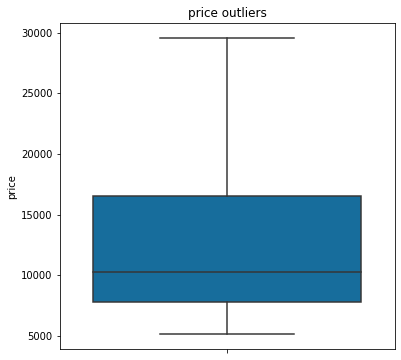

In [ ]:
#visualizing if outliers was removed
plt.figure(figsize=(6,6))
sns.boxplot(y='price',data=cars, 
                 palette="colorblind")
plt.title('price outliers');

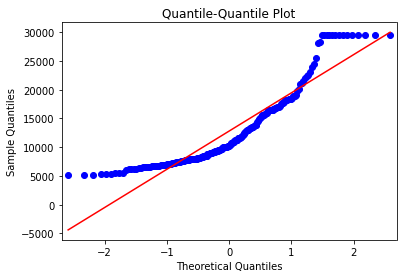

In [ ]:
#normalizing our numerical features with log-transformation
qqplot(cars['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()

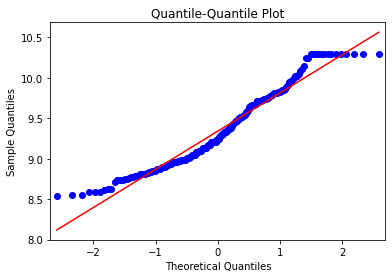

In [ ]:
#log-transformation of the target variable
cars['price'] = np.log1p(cars['price'])

qqplot(cars['price'], line='s')
plt.title('Quantile-Quantile Plot')
plt.show()

In [ ]:
#converting num_of_cylinders into a continuos variable
cars['num-of-cylinders'][cars['num-of-cylinders']=='two'] = 2
cars['num-of-cylinders'][cars['num-of-cylinders']=='three'] = 3
cars['num-of-cylinders'][cars['num-of-cylinders']=='four'] = 4
cars['num-of-cylinders'][cars['num-of-cylinders']=='five'] = 5
cars['num-of-cylinders'][cars['num-of-cylinders']=='six'] = 6
cars['num-of-cylinders'][cars['num-of-cylinders']=='eight'] = 8
cars['num-of-cylinders'][cars['num-of-cylinders']=='twelve'] = 12

cars['num-of-cylinders'] = cars['num-of-cylinders'].astype('int64')

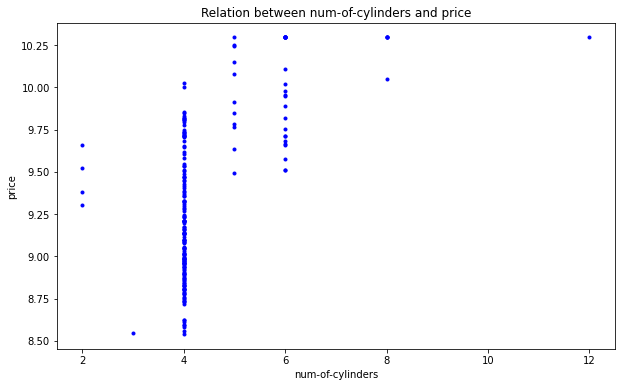

In [ ]:
#plotting a scatter plot of relation between num_of_cylinders and price
plt.figure(figsize=(10,6))
plt.plot(cars['num-of-cylinders']
         ,cars['price'],'.'
        ,color='blue')

plt.xlabel('num-of-cylinders')
plt.ylabel('price')
plt.title('Relation between num-of-cylinders and price');

In [ ]:
#taking numerical features to log trasformation
num_var = ['normalized-losses','wheel-base','length'
          ,'width','height','curb-weight','engine-size','bore'
           ,'stroke','compression-ratio','horsepower','peak-rpm'
           ,'city-mpg','highway-mpg','num-of-cylinders']

cars[num_var] = np.log1p(cars[num_var])

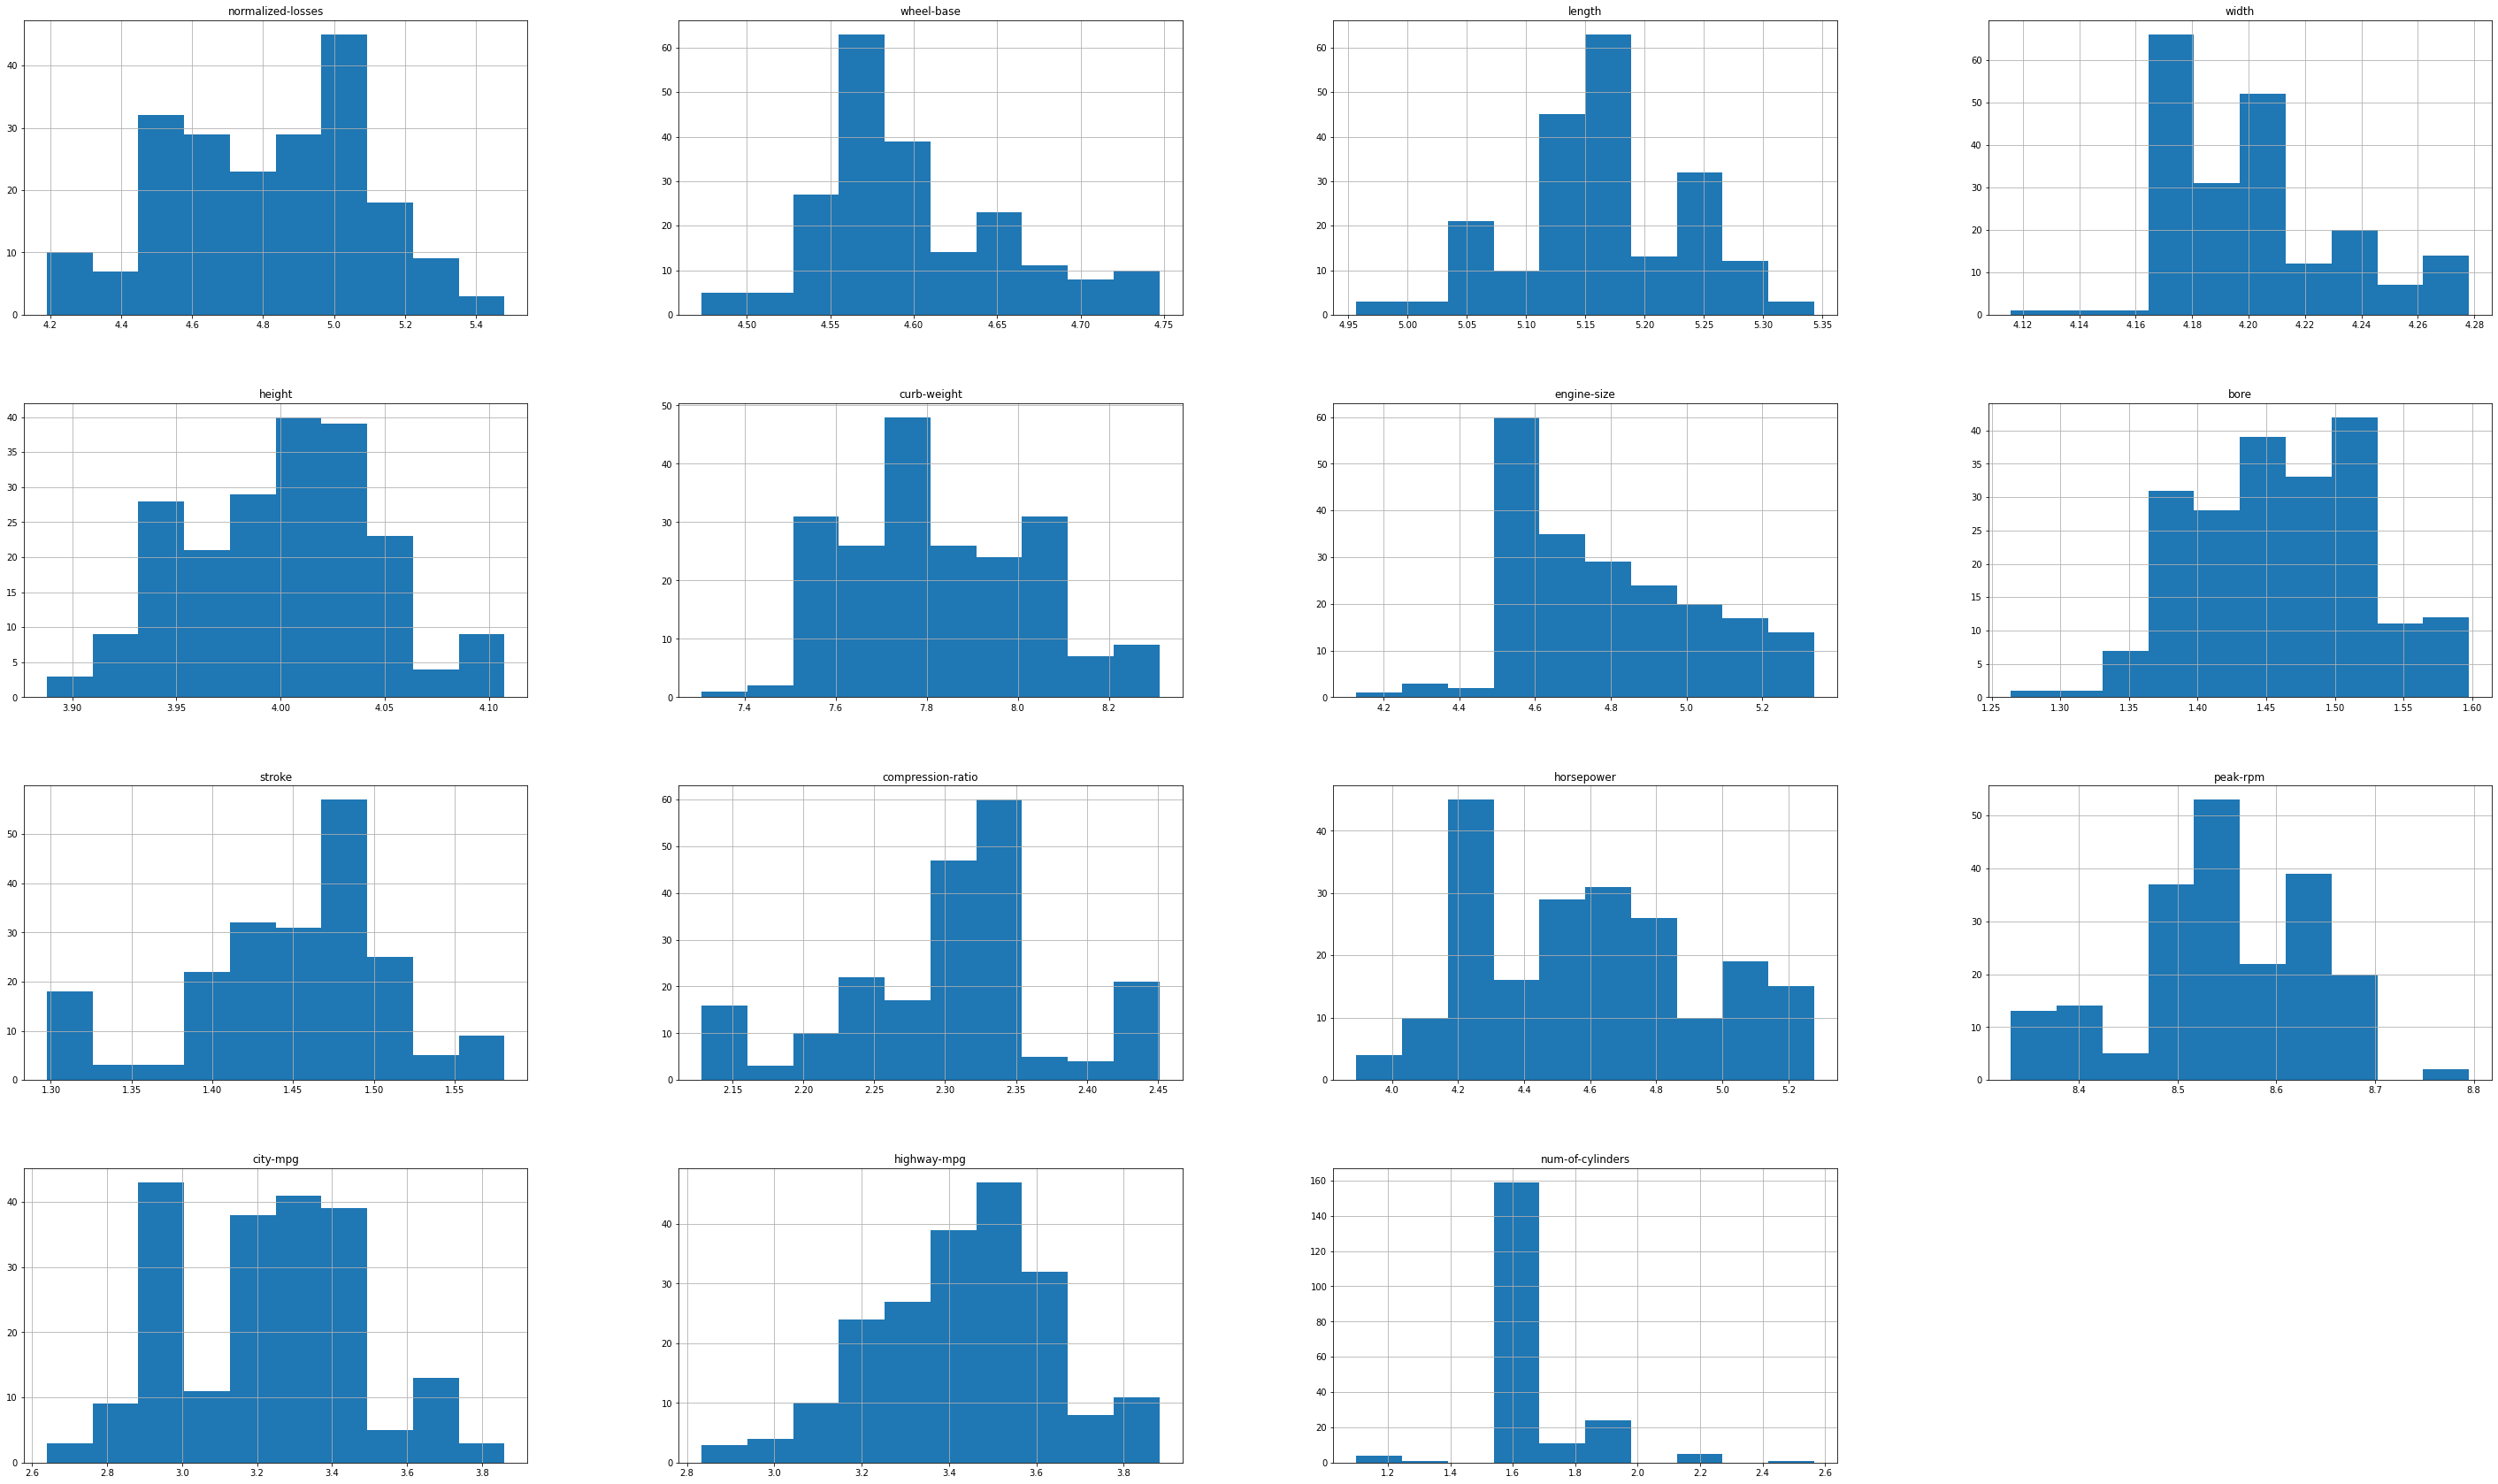

In [ ]:
#plotting a histogram for each feature
cars[num_var].hist(bins=10
                   , figsize=(50,30)
                   , layout=(4,4));

In [ ]:
#creating new features
cars['len_wid'] = cars['length']/cars['width']
cars['whb_c_wght'] = cars['wheel-base']/cars['curb-weight']
cars['hpw_eng_size'] = cars['horsepower']/cars['engine-size']
cars['hway_cit_mpg'] = cars['highway-mpg']/cars['city-mpg']

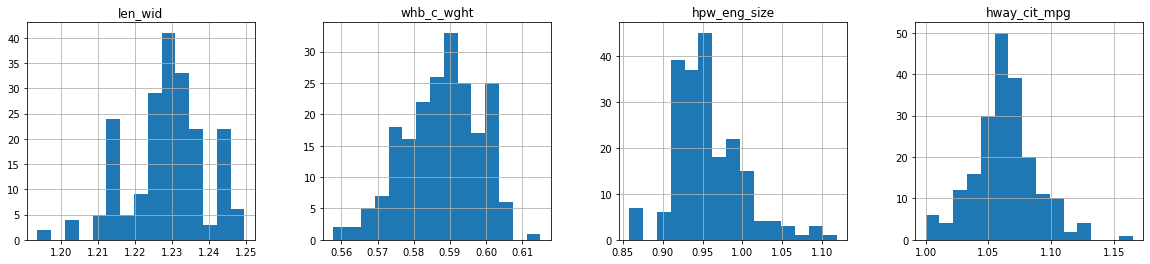

In [ ]:
#saving new features
new_feat1 = ['len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

cars[new_feat1].hist(bins=15
                   , figsize=(20,4)
                   , layout=(1,4));

In [ ]:
#creating a feature to represent the mean mpg
cars['mean_mpg'] = (cars['highway-mpg']+cars['city-mpg'])/2

#creating a feature to represent the horsepower per cylinders
cars['hpw_cylinders'] = cars['horsepower']/cars['num-of-cylinders']

#creating a feature to represent the mean mpg per horsepower
cars['mean_mpg_hpw'] = cars['mean_mpg']/cars['horsepower']

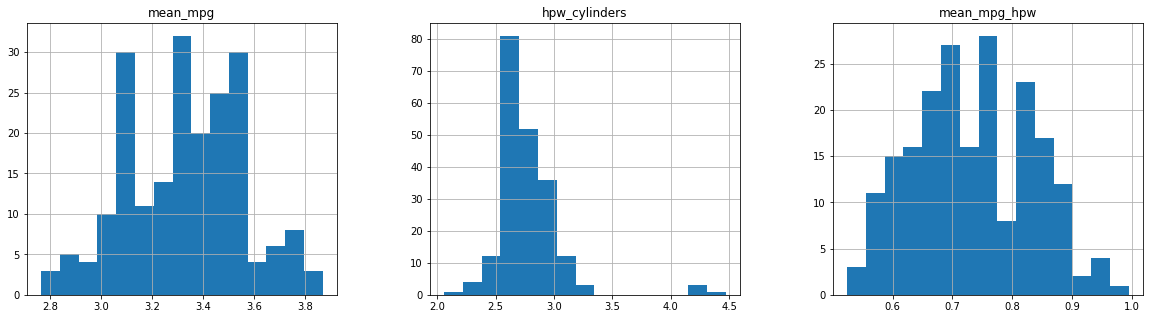

In [ ]:
#saving new features
new_feat2 = ['mean_mpg','hpw_cylinders','mean_mpg_hpw']

cars[new_feat2].hist(bins=15
                   , figsize=(20,5)
                   , layout=(1,3));

In [ ]:
#converting engine_location into binary
cars['engine-location'] = np.where(cars['engine-location']=='front',2,1)

#converting fuel_type into binary
cars['fuel-type'] = np.where(cars['fuel-type']=='gas',2,1)

#converting aspiration into binary
cars['aspiration'] = np.where(cars['aspiration']=='std',2,1)

#converting num_of_doors into binary
cars['num-of-doors'] = np.where(cars['num-of-doors']=='two',2,1)

In [ ]:
#converting maker to continuos based on boxplots
cars['make'][cars['make']=='chevrolet'] = 1
cars['make'][cars['make']=='renault'] = 2
cars['make'][cars['make']=='isuzu'] = 3
cars['make'][cars['make']=='subaru'] = 4
cars['make'][cars['make']=='plymouth'] = 5
cars['make'][cars['make']=='dodge'] = 6
cars['make'][cars['make']=='honda'] = 7
cars['make'][cars['make']=='volkswagen'] = 8
cars['make'][cars['make']=='mitsubishi'] = 9
cars['make'][cars['make']=='alfa-romero'] = 10
cars['make'][cars['make']=='mercury'] = 11
cars['make'][cars['make']=='toyota'] = 12
cars['make'][cars['make']=='peugot'] = 13
cars['make'][cars['make']=='mazda'] = 14
cars['make'][cars['make']=='saab'] = 15
cars['make'][cars['make']=='nissan'] = 16
cars['make'][cars['make']=='volvo'] = 17
cars['make'][cars['make']=='audi'] = 18
cars['make'][cars['make']=='jaguar'] = 19
cars['make'][cars['make']=='porsche'] = 20
cars['make'][cars['make']=='bmw'] = 21
cars['make'][cars['make']=='mercedes-benz'] = 22
cars['make']=cars['make'].astype('int64')

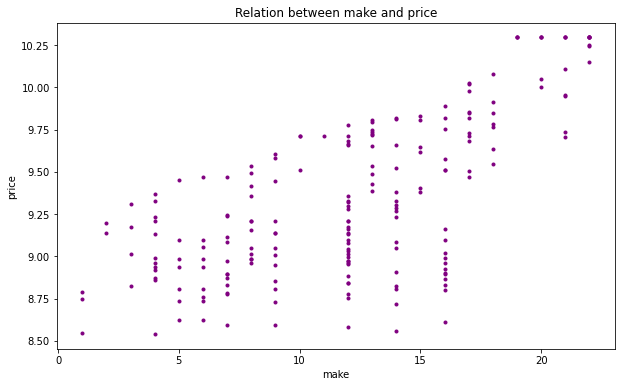

In [ ]:
#plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6))
plt.plot(cars['make']
         ,cars['price'],'.'
        ,color='purple')

plt.xlabel('make')
plt.ylabel('price')
plt.title('Relation between make and price');

In [ ]:
# converting fuel_system to continuos based on boxplots
cars['fuel-system'][cars['fuel-system']=='1bbl'] = 1
cars['fuel-system'][cars['fuel-system']=='spfi'] = 2
cars['fuel-system'][cars['fuel-system']=='2bbl'] = 3
cars['fuel-system'][cars['fuel-system']=='mfi'] = 4
cars['fuel-system'][cars['fuel-system']=='4bbl'] = 5
cars['fuel-system'][cars['fuel-system']=='spdi'] = 6
cars['fuel-system'][cars['fuel-system']=='idi'] = 7
cars['fuel-system'][cars['fuel-system']=='mpfi'] = 8
cars['fuel-system']=cars['fuel-system'].astype('int64')

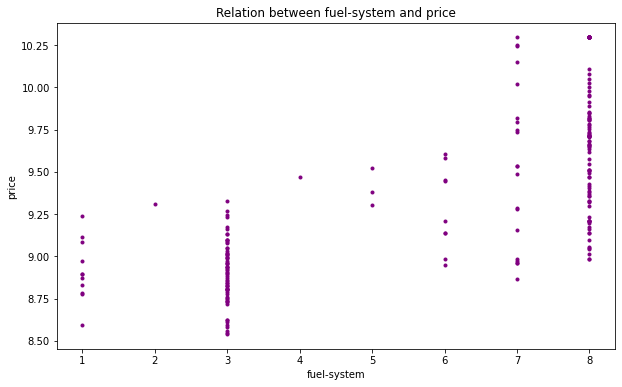

In [ ]:
#plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6))
plt.plot(cars['fuel-system']
         ,cars['price'],'.'
        ,color='purple')

plt.xlabel('fuel-system')
plt.ylabel('price')
plt.title('Relation between fuel-system and price');

In [ ]:
#converting engine_type to continuos based on boxplots
cars['engine-type'][cars['engine-type']=='rotor'] = 1
cars['engine-type'][cars['engine-type']=='l'] = 2
cars['engine-type'][cars['engine-type']=='dohcv'] = 3
cars['engine-type'][cars['engine-type']=='dohc'] = 4
cars['engine-type'][cars['engine-type']=='ohcf'] = 5
cars['engine-type'][cars['engine-type']=='ohc'] = 6
cars['engine-type'][cars['engine-type']=='ohcv'] = 7
cars['engine-type']=cars['engine-type'].astype('int64')

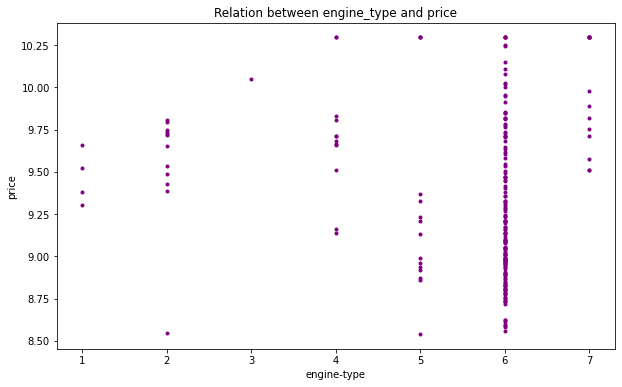

In [ ]:
#plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6))
plt.plot(cars['engine-type']
         ,cars['price'],'.'
        ,color='purple')

plt.xlabel('engine-type')
plt.ylabel('price')
plt.title('Relation between engine_type and price');

In [ ]:
#converting body_style to continuos based on boxplots
cars['body-style'][cars['body-style']=='hatchback'] = 1
cars['body-style'][cars['body-style']=='wagon'] = 2
cars['body-style'][cars['body-style']=='convertible'] = 4
cars['body-style'][cars['body-style']=='sedan'] = 3
cars['body-style'][cars['body-style']=='hardtop'] = 5
cars['body-style']=cars['body-style'].astype('int64')

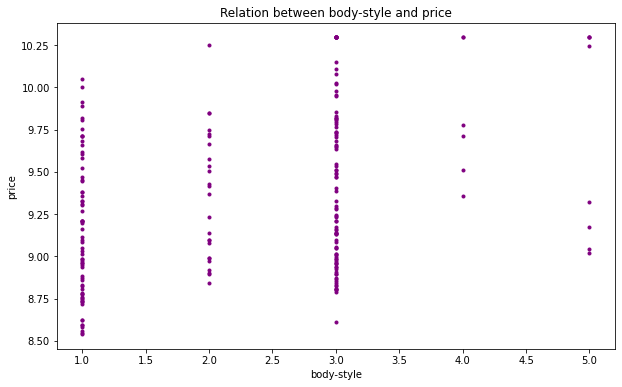

In [ ]:
#plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6))
plt.plot(cars['body-style']
         ,cars['price'],'.'
        ,color='purple')

plt.xlabel('body-style')
plt.ylabel('price')
plt.title('Relation between body-style and price');

In [ ]:
#converting drive_wheels to continuos based on boxplots
cars['drive-wheels'][cars['drive-wheels']=='4wd'] = 1
cars['drive-wheels'][cars['drive-wheels']=='fwd'] = 2
cars['drive-wheels'][cars['drive-wheels']=='rwd'] = 3
cars['drive-wheels']=cars['drive-wheels'].astype('int64')

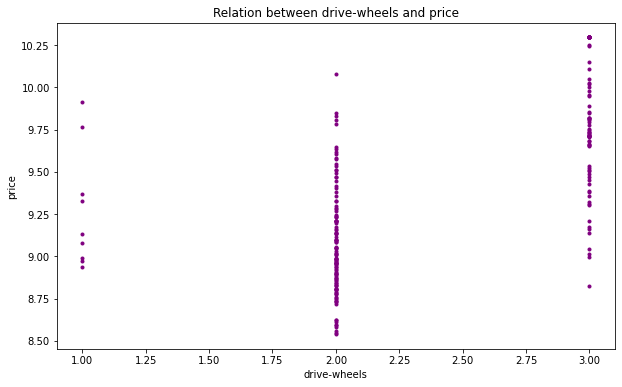

In [ ]:
#plotting a scatter plot of relation between width and price
plt.figure(figsize=(10,6))
plt.plot(cars['drive-wheels']
         ,cars['price'],'.'
        ,color='purple')

plt.xlabel('drive-wheels')
plt.ylabel('price')
plt.title('Relation between drive-wheels and price');

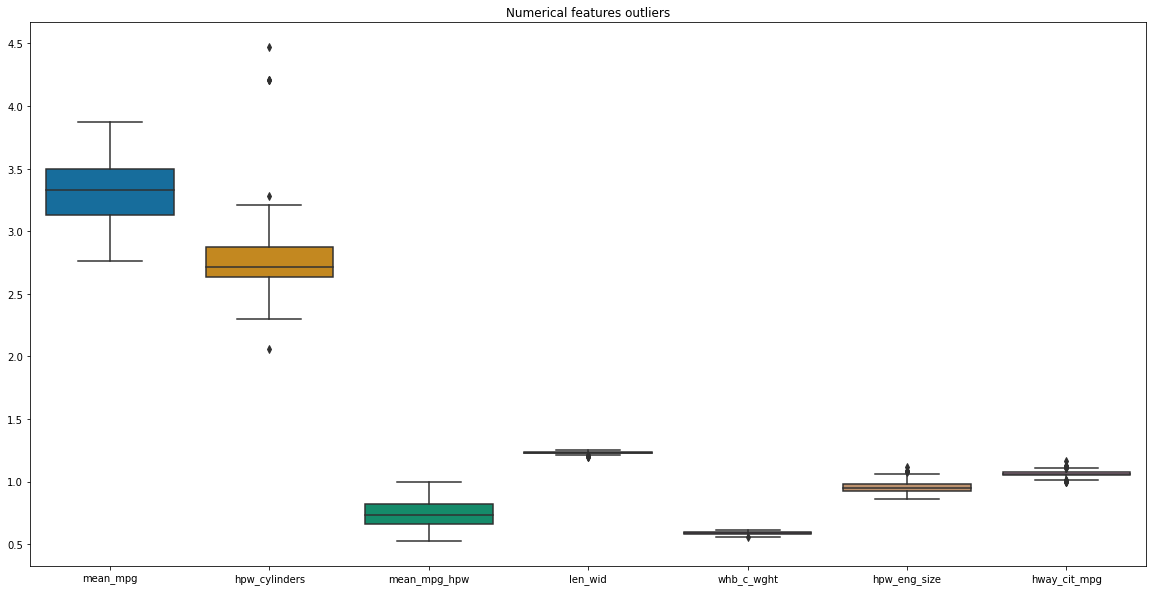

In [ ]:
#dealing with outliers in new features
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outliers');

In [ ]:
#creating a for to replace outliers using boxplot method
for i in num_var:
    Q1 = cars[i].quantile(0.25)
    Q3 = cars[i].quantile(0.75)
    IQR = Q3 - Q1
    cars[i] = np.where(cars[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),cars[i])
    cars[i] = np.where(cars[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),cars[i])

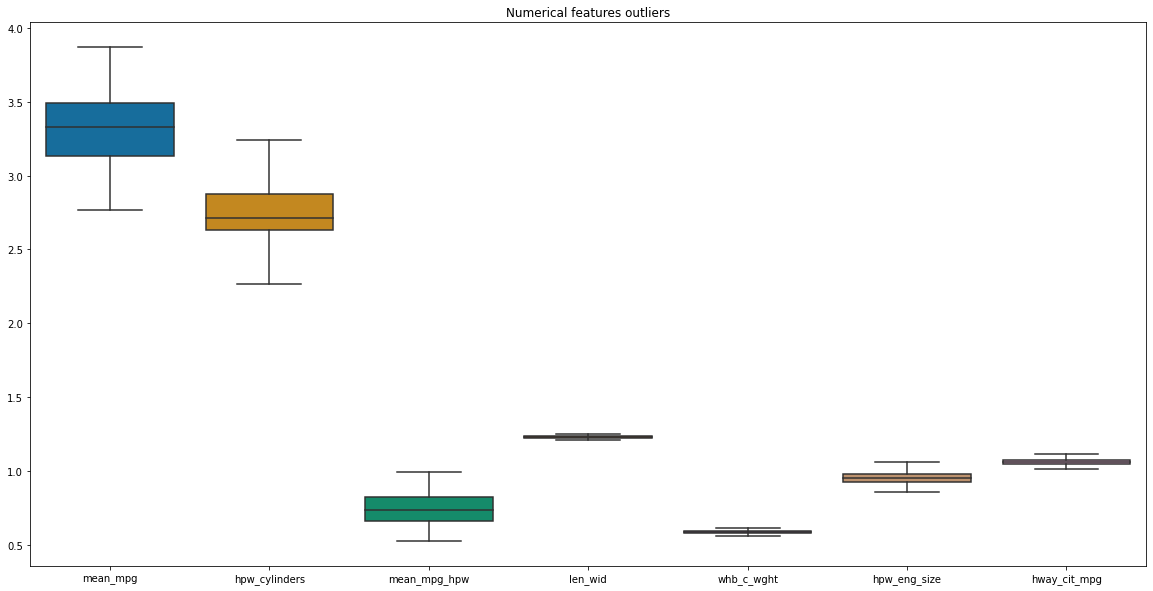

In [ ]:
#plotting boxplots to numeric features
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg']

plt.figure(figsize=(20,10))
sns.boxplot(data=cars[num_var], 
                 palette="colorblind")
plt.title('Numerical features outliers');

In [ ]:
#normalizing new features with log transformation
num_var = ['mean_mpg','hpw_cylinders','mean_mpg_hpw'
           ,'len_wid','whb_c_wght','hpw_eng_size','hway_cit_mpg'
          ,'make','drive-wheels','body-style','engine-type','fuel-system'
          ,'engine-location','fuel-type','aspiration','num-of-doors']

cars[num_var] = np.log1p(cars[num_var])

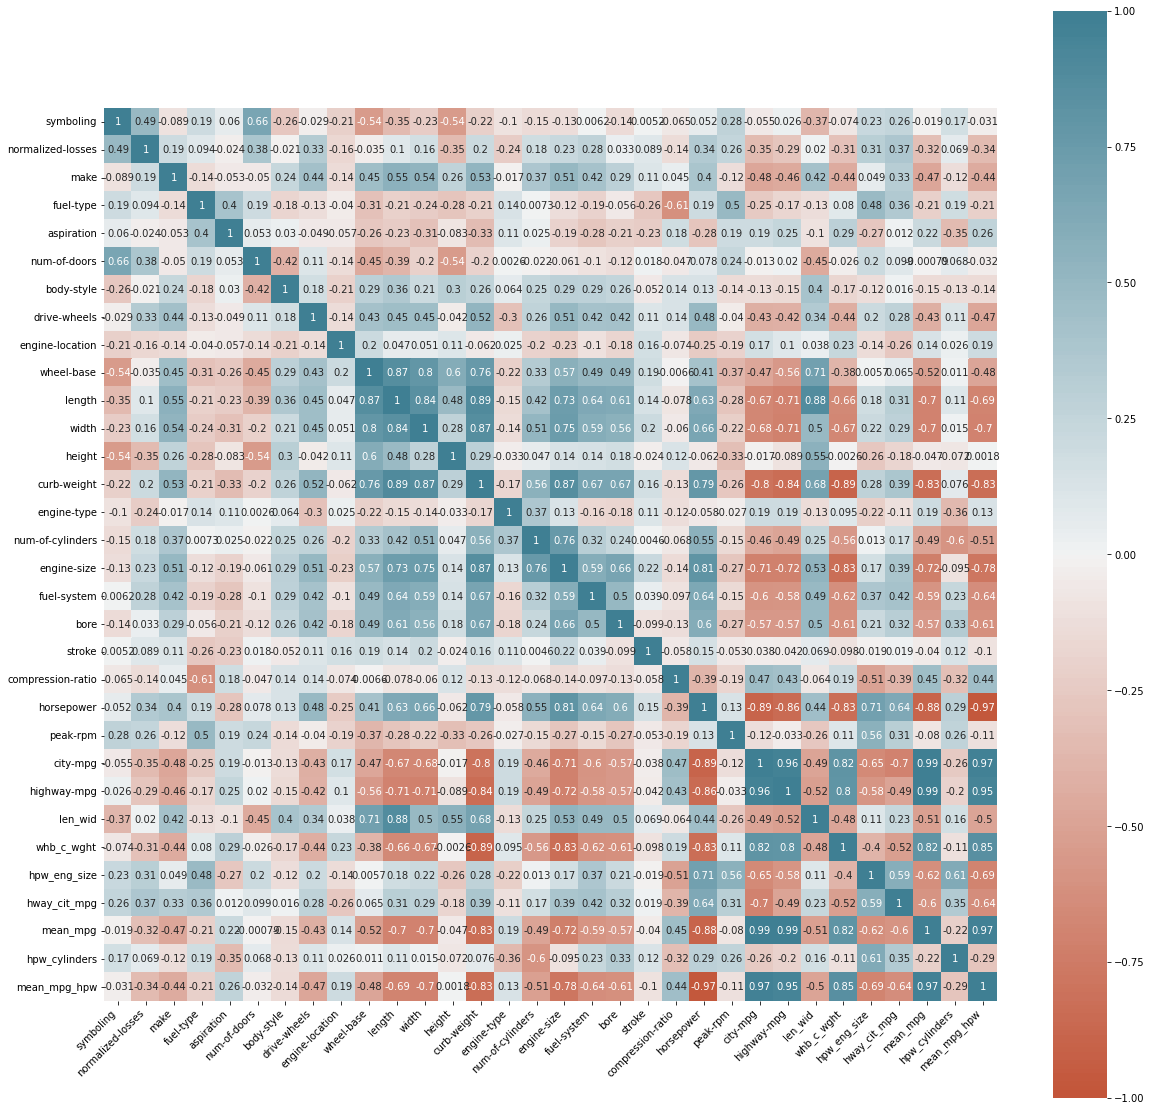

In [ ]:
#removing high correlated features
cars_noprice = cars.drop('price',axis=1)

corr = cars_noprice.corr()

plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#creating the correlation matrix
corr_matrix = cars_noprice.corr().abs()

#creating a mask to apply to our correlation matrix and filter high correlations
mask = np.triu(np.ones_like(corr_matrix,dtype=bool))

#replacing low correlations with NA's
tri_df = corr_matrix.mask(mask)

#selecting features to dropp that have correlation with each other above 0.80
to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.8)]

#dropping high correlated features
cars = cars.drop(to_drop,axis=1)

In [ ]:
#saving prices
price = cars['price']

#dropping prices from cars dataset
cars = cars.drop('price',axis=1)

#join prices into our dataset again
cars['price'] = price

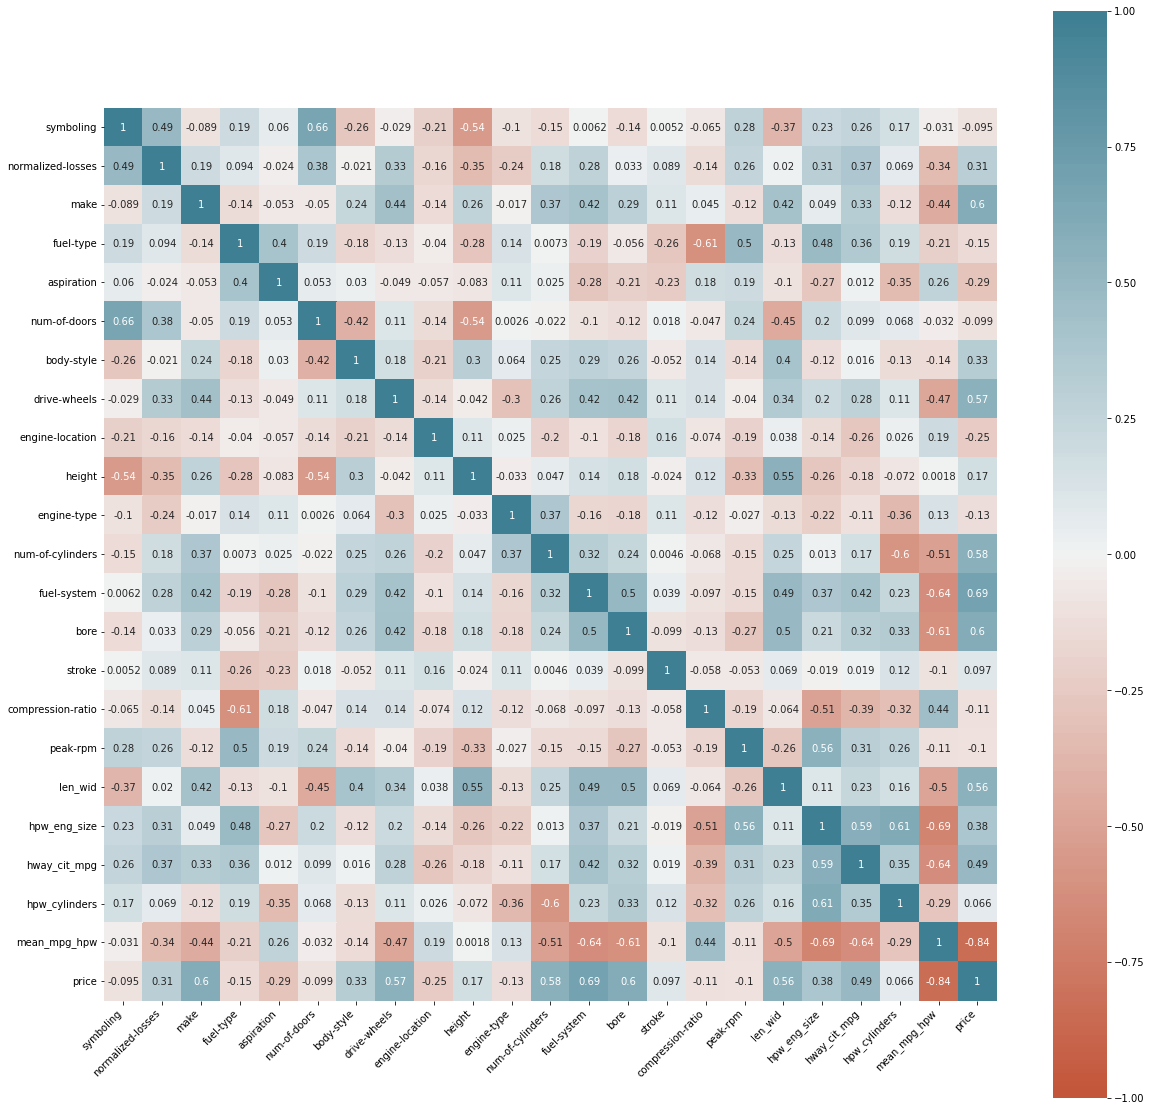

In [ ]:
#numerical variables correlation
corr = cars.corr()

plt.figure(figsize=(20,20))
ax = sns.heatmap(
    corr,vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#saving prices
price = cars['price']

#dropping prices from cars dataset
cars = cars.drop('price',axis=1)

#join prices into our dataset again
cars['price'] = price

In [ ]:
#modelling
x1 = cars.drop('price', axis=1)
y1 = cars['price']

In [ ]:
#splitting our dataset into train and target
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.7,random_state=42)

In [ ]:
#training the model
regression = LinearRegression()
regression.fit(x_train1, y_train1)

LinearRegression()

In [ ]:
#predicting on train dataset
y_pred_train1 = regression.predict(x_train1)
y_pred_train1 = np.exp(y_pred_train1)

In [ ]:
#predicting on test dataset
y_pred_test1 = regression.predict(x_test1)
y_pred_test1 = np.exp(y_pred_test1)

In [ ]:
#removing log transformation from our target
y_train1_exped = np.exp(y_train1)
y_test1_exped = np.exp(y_test1)

In [ ]:
#model quality metrics in train dataset prediction
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train1_exped, y_pred_train1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train1_exped, y_pred_train1)))

Mean Absolute Error: 1485.3418423516678
Root Mean Squared Error: 2034.0182520938245


In [ ]:
#model quality metrics in test dataset prediction
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1_exped, y_pred_test1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1_exped, y_pred_test1)))

Mean Absolute Error: 1882.519641814576
Root Mean Squared Error: 2525.463345989187


In [ ]:
#calculating the mean of our car prices
print("The mean price of our test dataset is: ")
print(y_test1_exped.mean())
print()

#calculating mae ratio
print("The MAE percentage in relation to mean price of our test dataset is: ")
print(round(metrics.mean_absolute_error(y_test1_exped, y_pred_test1)/y_test1_exped.mean()*100,2))

The mean price of our test dataset is: 
12335.802083333332

The MAE percentage in relation to mean price of our test dataset is: 
15.26


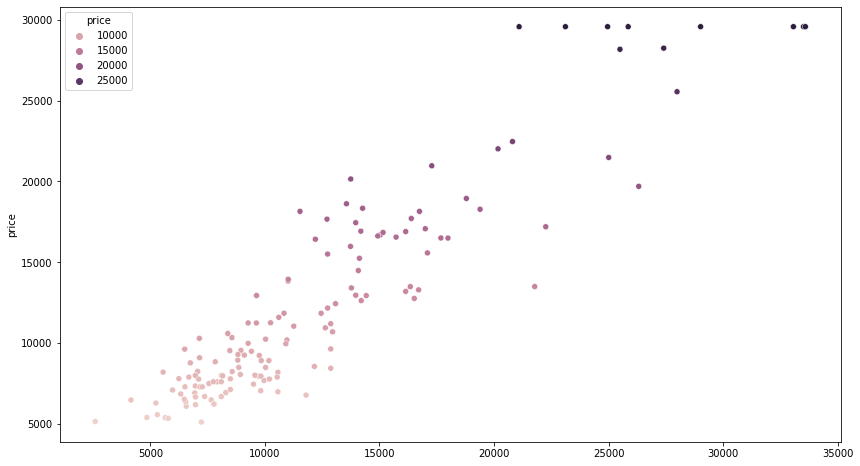

In [ ]:
# draw the figure to recieve a plot
plt.figure(figsize=(14,8))

# creating a scatter plot with seaborn
sns.scatterplot(x=y_pred_test1, y=y_test1_exped,hue=y_test1_exped);